<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset is called TMBD movie dataset. This dataset has more than 10,000 rows of data. The columns are tagline, overview, runtime, genres, production companies, release date, vote count, vote average, release date, id, idmbd id, popularity, budget, revenue, original title, cast, homepage, and director. 

### Question(s) for Analysis
1. Does higher budget mean that the movie is going to have more revenue?
2. Does higher budget mean that the movie will have higher ratings?
3. Does the genre of a movie affect the revenue of a movie?
4. Does the ratings of a movie mean that it gain more revenue?
5. What are the most produced movie genres?

In [1]:
# I used this cell to import numpy, pandas, matpotlib and seaborn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import itemfreq
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### Reading in of the data
read_csv was used to load the data to Jupyter Notebook. This was to have a view of the data to make it easier to view the type of data that was in each column. 

In [2]:
# load the data using read_csv
df = pd.read_csv('tmdb_movies.csv')
# print the first five rows of each column of the tmdb movies dataset. 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# To determine the number of rows and columns
df.shape

(10866, 21)

In [4]:
# This will list the columns, the number of non-null in the column, and the data type of the column.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The dataset showed that there were different types of data types, such as integers, float, and object data types. The DMBD data set has 10,866 rows and 21 columns. The dataset also has null values in homepage, tagline, cast, keywords, and production companies columns.


### Data Cleaning
Since the data above had null values, the aim in this part of data cleaning was to remove the columns and/rows of the DMBD dataset that contained the had null values. This is because null values make it impossible to analyse data. 
Please note that the columns with high number of null values, for example, where more than 10% were empty cell, the columns are going to be deleted. It would unreasonable to delete large chunks of data just because one column had null values. 

In [5]:
# Copying the data in order to modify the original file
full = df.copy()

In [6]:
# Deleting the columns with high number of null elements, i.e, with more than 10% null elements
full.drop(['homepage','tagline', 'keywords', 'production_companies'],axis=1,inplace=True)

In [7]:
# Deleting the rows with null elements
full.dropna(inplace=True)

In [8]:
# Showing the 
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10725 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10725 non-null  int64  
 1   imdb_id         10725 non-null  object 
 2   popularity      10725 non-null  float64
 3   budget          10725 non-null  int64  
 4   revenue         10725 non-null  int64  
 5   original_title  10725 non-null  object 
 6   cast            10725 non-null  object 
 7   director        10725 non-null  object 
 8   overview        10725 non-null  object 
 9   runtime         10725 non-null  int64  
 10  genres          10725 non-null  object 
 11  release_date    10725 non-null  object 
 12  vote_count      10725 non-null  int64  
 13  vote_average    10725 non-null  float64
 14  release_year    10725 non-null  int64  
 15  budget_adj      10725 non-null  float64
 16  revenue_adj     10725 non-null  float64
dtypes: float64(4), int64(6), object

In [9]:
full.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
mixed_cast = full['cast'].unique()

In [11]:
unique_cast = []

In [12]:
for x in mixed_cast:
    for i in x.split(','):
        if i.lower() not in unique_cast:
            unique_cast.append(i.lower())

In [23]:
# print te first five cast members
unique_cast[5]

'leonardo dicaprio|tom hardy|will poulter|domhnall gleeson|paul anderson'

In [14]:
mixed_genres = full['genres'].unique()

In [15]:
unique_genres = []

In [16]:
for x in mixed_genres:
    for i in x.split(','):
        if i.lower() not in unique_genres:
            unique_genres.append(i.lower())

In [24]:
# print the first five movie genres
unique_genres[5]

'science fiction|action|thriller|adventure'

Homepage, tagline, keywords, and production_companies columns were eliminated because the null values were more than 10%. Also, the null values in the remaining columns were deleted. 10725 rows were the number of rows that we're going to base our analysis on. These were the non-null rows retained. 16 columns or variables were retained for the analysis. 

Since the cast and genre were object type data type, a list was created from these two columns.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Proportion of Movie Genres Most Produced)

In [18]:
# define a Series that can be used to get unique items in the genre column
def data(column):
    data = full[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

In [19]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Drama       4745
Comedy      3774
Thriller    2903
Action      2372
Romance     1707
dtype: int64

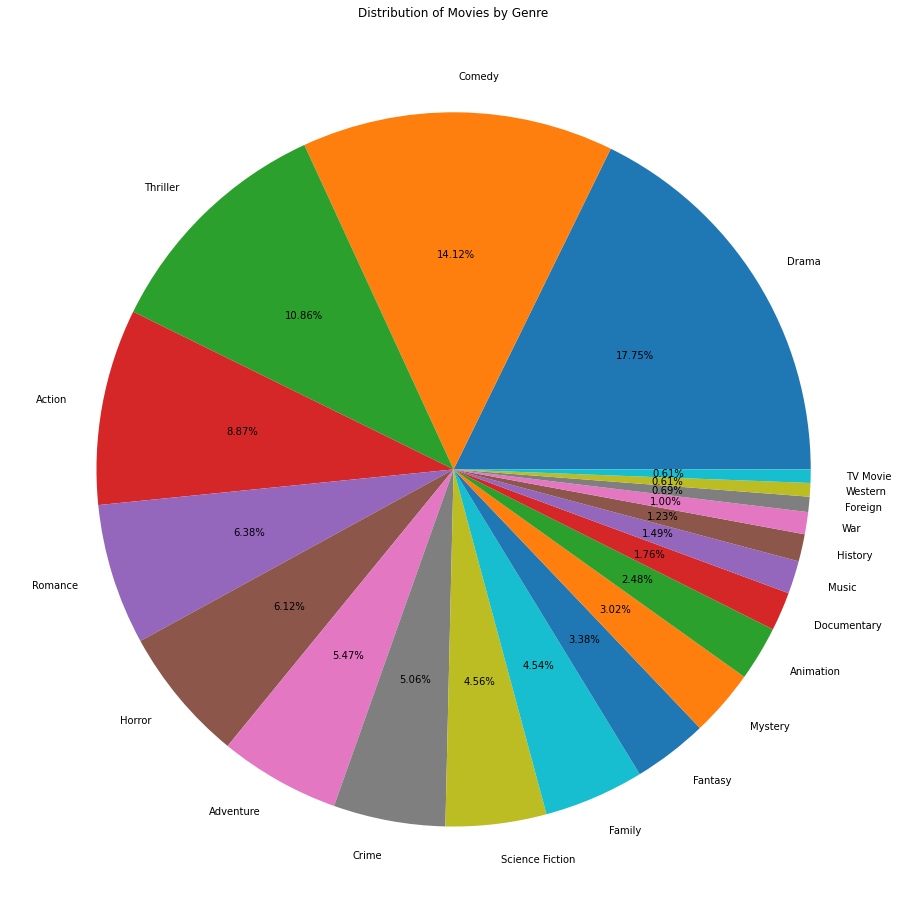

In [20]:
fig = plt.figure(figsize=(16,20))
plt.pie(count.values, labels = count.index, autopct='%1.2f%%')
plt.title("Distribution of Movies by Genre")
# Using the show() command to graph the genres 
plt.show() 

A pie chart was used to analyse the most popular movie genres. This pie chart shows that drama was the most preferred type of genre to be produced with 17.75 percent of the movies produced being drama movies. This was followed by comedy at 14.12 percent, thriller movies at 10.86 percent, and action with 8.87 percent. The least produced genres of movies were TV movie, western, foreign, and war, with 0.61, 0.61, 0.69, and 1 percent respectively. 

### Research Question 2  (Relationship between revenue and budget)

<function matplotlib.pyplot.show(close=None, block=None)>

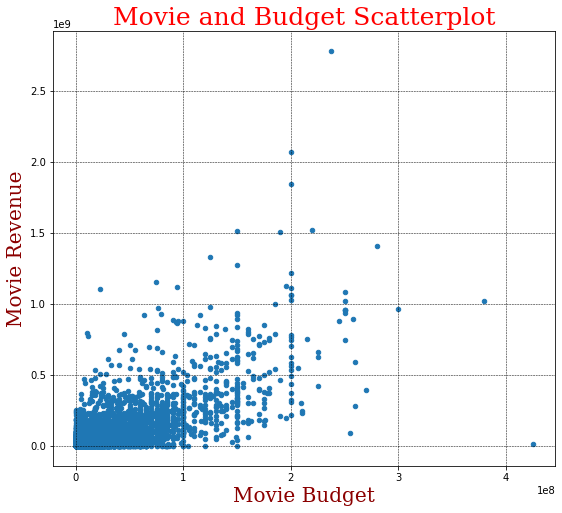

In [21]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df = pd.DataFrame(full, columns=["revenue", "budget"])
df.plot(x="budget", y="revenue", kind="scatter", marker ='o', figsize=(9, 8))
# To change the size of the fonts used in the scatter pplot
font1 = {'family':'serif','color':'red','size':25}
font2 = {'family':'serif','color':'darkred','size':20}

plt.title("Movie and Budget Scatterplot", fontdict = font1)
plt.xlabel("Movie Budget", fontdict = font2)
plt.ylabel("Movie Revenue", fontdict = font2)
# grid makes a graph appealing. Linestyle is specified and linewidth is also specified.
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.show

One can clearly see that there is some sort of relationship between revenue and budget. The higher the budget of a movie, the higher the probability that the movie will produce more revenue. 



<a id='conclusions'></a>
## Conclusions
There is a relationship between movies budget and movies revenue. The higher the budget of a movie was, the higher the revenue was for the movie. The most produced movie genres are drama, comedy and thrillers. It would make sense if a producer would specialize on the three types of movie as the seem to the most marketable movie. The only challenge to my conclusion is that more analysis is needed to ascertain how marketable and popular these movies are in the market.

## Limitations
1. The Imdb dataset had a limited sample of 10,000. Usually analysis becomes more accurate as the sample size increases. It can therefore be assumed that the analysis would have been accurate if there was a bigger sample. 
2. The dataset was based on the ratings of one movie rating site. There are many types of credible movie sites with credible information like IMDB is. Therefore, the data in this case was limited to the data collected in one dataset which is a limiting factor. 

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1